In [1]:
# import libraries
# data manupulation
import pandas as pd
import numpy as np
from scipy.stats import norm
# visualization
import matplotlib.pyplot as plt
from tabulate import tabulate
import math as math

In [2]:
# taylor expansion of N(x)
def CDF(X):
    (a1, a2, a3, a4, a5) = (0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429)
    x = abs(X)
    k = 1/(1 + 0.2316419*x)
    n = (1/math.sqrt(2*math.pi))*math.exp(-0.5*x**2)
    N = 1.0-n*(a1*k+a2*k**2+a3*pow(k,3)+a4*pow(k,4)+a5*pow(k,5))
    if X<0:
        N=1.0-N
    return N

X = float(input("enter value of x\n"))
print('The prob that X<',X,'is',CDF(X))

enter value of x
0.99
The prob that X< 0.99 is 0.8389129387862682


In [3]:
# Black-Scholes Model
from math import *

def CDF(X): # N(x)
    (a1, a2, a3, a4, a5) = (0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429)
    x = abs(X)
    k = 1/(1 + 0.2316419*x)
    n = (1/math.sqrt(2*math.pi))*math.exp(-0.5*x**2)
    N = 1.0-n*(a1*k+a2*k**2+a3*pow(k,3)+a4*pow(k,4)+a5*pow(k,5))
    if X<0:
        N=1.0-N
    return N

#______________________________________________________________________________________________

def d1(stock, strike, r, sigma, div, tau):
    moneyness = log(stock/strike, e)
    shift = r - div + 0.5*sigma**2
    d1 = (moneyness + shift*tau)/(sigma*sqrt(tau))
    return d1

#______________________________________________________________________________________________

def d2(d1, sigma, tau):
    d2 = d1 - sigma * sqrt(tau)
    return d2

#______________________________________________________________________________________________

def call_option(d1, d2, stock, div, strike, r, tau):
    call = stock * exp(-div*tau)*CDF(d1)-exp(-r*tau)*strike*CDF(d2)
    return call

#______________________________________________________________________________________________

def put_option(d1, d2, stock, div, strike, r, tau):
    put = -stock * exp(-div*tau)*CDF(-d1) + exp(-r*tau)*strike*CDF(-d2)
    return put

#______________________________________________________________________________________________

def binary_call_option(d1, d2, stock, div, strike, r, tau):
    b_call = exp(-r*tau)*CDF(d2)
    return b_call

#______________________________________________________________________________________________

def binary_put_option(d1, d2, stock, div, strike, r, tau):
    b_put = exp(-r*tau) *(1-CDF(d2))
    return b_put

#______________________________________________________________________________________________

stock = float(input('enter the stock price:'))
strike = float(input('enter the strike:'))
r = float(input('the risk-free rate is:'))
div = float(input('dividend yield is:'))
sigma = float(input('the stock vol is:'))
T = float(input('enter the option expiry:'))
t = float(input('valuation time is:'))
tau = T-t
d1 = d1(stock, strike, r, sigma, div, tau)
d2 = d2(d1, sigma, tau)

print('the call has price:', call_option(d1, d2, stock, div, strike, r, tau))
print('the put has price:', put_option(d1, d2, stock, div, strike, r, tau))
print('the binary call has price:', binary_call_option(d1, d2, stock, div, strike, r, tau))
print('the binary put has price:', binary_put_option(d1, d2, stock, div, strike, r, tau))

enter the stock price:100
enter the strike:100
the risk-free rate is:0.05
dividend yield is:0.01
the stock vol is:0.2
enter the option expiry:1
valuation time is:0.5
the call has price: 6.594015438973386
the put has price: 4.623758722538412
the binary call has price: 0.5151450991121989
the binary put has price: 0.46016481291613376


In [4]:
# class is object constructor to define functions/methods
class OxfordStudent:
    def __init__(self, studentName, studentNumber, studentSubject): # define the properties of class objects
        # self to represent instance to access attributes
        self.name = studentName
        self.number = studentNumber
        self.subject = studentSubject
    def speak(self): 
        print('my name is ' + self.name + ' and i study ' + self.subject)

In [5]:
student_1 = OxfordStudent('Riaz', 786612,'Mathematics')

In [6]:
student_1.name

'Riaz'

In [7]:
type(student_1.number)

int

In [8]:
print(student_1.subject)

Mathematics


In [9]:
student_1.speak()

my name is Riaz and i study Mathematics


In [10]:
# user-defined data structure
class vector: 
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __eq__(self, other): #==
        return (self.x == other.x) and (self.y == other.y) and (self.z == other.z)
    
    def __str__(self): #print()
        return "(" + str(self.x) + ") \n(" + str(self.y) + ") \n(" + str(self.z) +")"
    
    def __add__(self, other): #+
        return vector(self.x + other.x, self.y + other.y, self.z + other.z)

In [11]:
v1 = vector(3,2,1)
v2 = vector(3,2,1)

In [12]:
v1 == v2

True

In [13]:
v3 = v1+v2
print(v3)

(6) 
(4) 
(2)


In [14]:
# rewrite BSM into a class
class BS:
    
    """
    this is a class for options contract for pricing european options on stocks without dividends
    
    attributes:
        spot       : int or float
        strike     : int or float
        rate       : int or float
        ttm        : int or float (days to expiry in number of years)
        vol        : float
    """
    
    def __init__(self, spot, strike, rate, ttm, vol):
        
        # spot price
        self.spot = spot
        
        # strike price
        self.strike = strike
        
        # risk-free rate
        self.rate = rate
        
        # days to expire
        self.ttm = ttm
        
        # stock vol
        self.vol = vol
        
        # calculated utility (d2=d1-utility)
        self._a_ = self.vol * (self.ttm ** 0.5)
        
        # calculated d1
        if self.strike == 0:
            raise ZeroDevisionError('the strike price cannot be zero') # raise an exception
        else:
            self._d1_ = (np.log(self.spot/self.strike) + (self.rate + 0.5 * (self.vol**2))*self.ttm ) / self._a_
        
        # calculated d2
        self._d2_ = self._d1_ - self._a_
        
        # calculated discount factor
        self._b_ = np.exp(-(self.rate * self.ttm))
        
        
        # The __dict__ attribute
        '''
        Contains all the attributes defined for the object itself. It maps the attribute name to its value.
        '''
        for i in ['callPrice', 'putPrice', 'callDelta', 'putDelta', 'callTheta', 'putTheta', \
                  'callRho', 'putRho', 'vega', 'gamma']:
            self.__dict__[i] = None
        
        [self.callPrice, self.putPrice] = self._price()
        [self.callDelta, self.putDelta] = self._delta()
        [self.callTheta, self.putTheta] = self._theta()
        [self.callRho, self.putRho] = self._rho()
        self.vega = self._vega()
        self.gamma = self._gamma()
        
    
    # Option Price
    def _price(self):
        '''Returns the option price: [Call price, Put price]'''

        if self.vol == 0 or self.ttm == 0:
            call = np.maximum(0.0, self.spot - self.strike)
            put = np.maximum(0.0, self.strike - self.spot)
        else:
            call = self.spot * norm.cdf(self._d1_) - self.strike * self._b_ * norm.cdf(self._d2_)
            put = self.strike * self._b_ * norm.cdf(-self._d2_) - self.spot * norm.cdf(-self._d1_)
            
        return [call, put]

    
    # Option Delta
    def _delta(self):
        '''Returns the option delta: [Call delta, Put delta]'''

        if self.vol == 0 or self.ttm == 0:
            call = 1.0 if self.spot > self.strike else 0.0
            put = -1.0 if self.spot < self.strike else 0.0
        else:
            call = norm.cdf(self._d1_)
            put = -norm.cdf(-self._d1_)
        
        return [call, put]

    
    # Option Gamma
    def _gamma(self):
        '''Returns the option gamma'''
        return norm.pdf(self._d1_) / (self.spot * self._a_)

    
    # Option Vega
    def _vega(self):
        '''Returns the option vega'''
        if self.vol == 0 or self.ttm == 0:
            return 0.0
        else:
            return self.spot * norm.pdf(self._d1_) * self.ttm**0.5 / 100

        
    # Option Theta
    def _theta(self):
        '''Returns the option theta: [Call theta, Put theta]'''
        call = -self.spot * norm.pdf(self._d1_) * self.vol / (2 * self.ttm**0.5) - self.rate * self.strike * self._b_ * norm.cdf(self._d2_)
        put = -self.spot * norm.pdf(self._d1_) * self.vol / (2 * self.ttm**0.5) + self.rate * self.strike * self._b_ * norm.cdf(-self._d2_)   
        
        return [call / 365, put / 365]

    
    # Option Rho
    def _rho(self):
        '''Returns the option rho: [Call rho, Put rho]'''
        call = self.strike * self.ttm * self._b_ * norm.cdf(self._d2_) / 100
        put = -self.strike * self.ttm * self._b_ * norm.cdf(-self._d2_) / 100

        return [call, put]

In [15]:
# initialize option
option = BS(100,100,0.05,1,0.2)
# put the results into a table
header = ['Option Price (Call)','Delta','Gamma','Theta','Vega','Rho']
table = [[option.callPrice, option.callDelta, option.gamma, option.callTheta, option.vega, option.callRho]]
print(tabulate(table, header))

  Option Price (Call)     Delta     Gamma       Theta     Vega       Rho
---------------------  --------  --------  ----------  -------  --------
              10.4506  0.636831  0.018762  -0.0175727  0.37524  0.532325


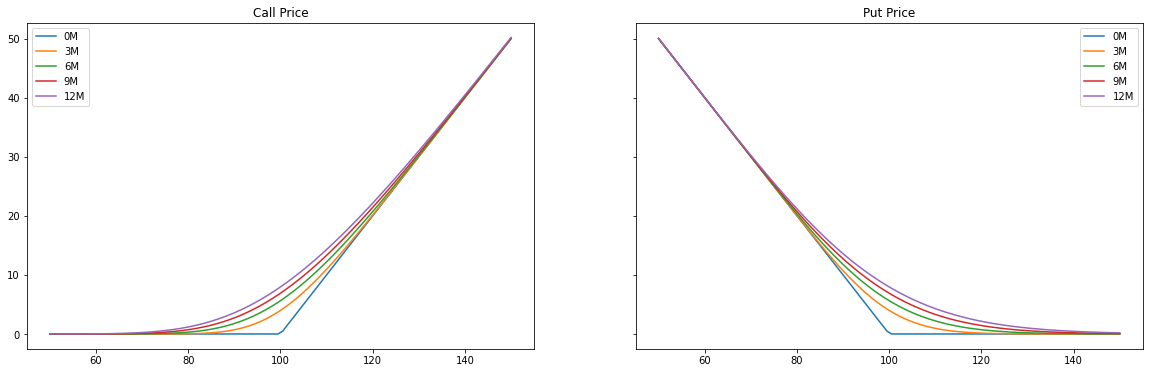

In [16]:
# visualize

figure, axes = plt.subplots(1, 2, figsize=(20,6), sharey=True)

x = np.linspace(50,150,100)
d = {'0M': 1e-50, '3M': 0.25, '6M':0.5, '9M': 0.75, '12M': 1.0}

for k, v in d.items():
    axes[0].plot(x, BS(x,100,0.0,v,0.2).callPrice, label=k)
    axes[1].plot(x, BS(x,100,0.0,v,0.2).putPrice, label=k)

# set axis title
axes[0].set_title('Call Price')
axes[1].set_title('Put Price')

# define legend
axes[0].legend(), axes[1].legend()

plt.show()

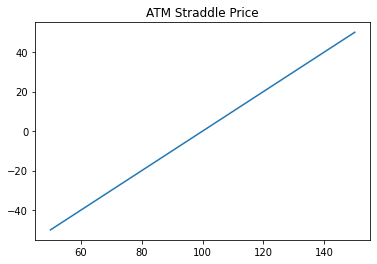

In [17]:
# Plot straddle price 

plt.plot(x, (BS(x,100,0.0,1,0.2).callPrice - BS(x,100,0.0,1,0.2).putPrice))
plt.title('ATM Straddle Price');

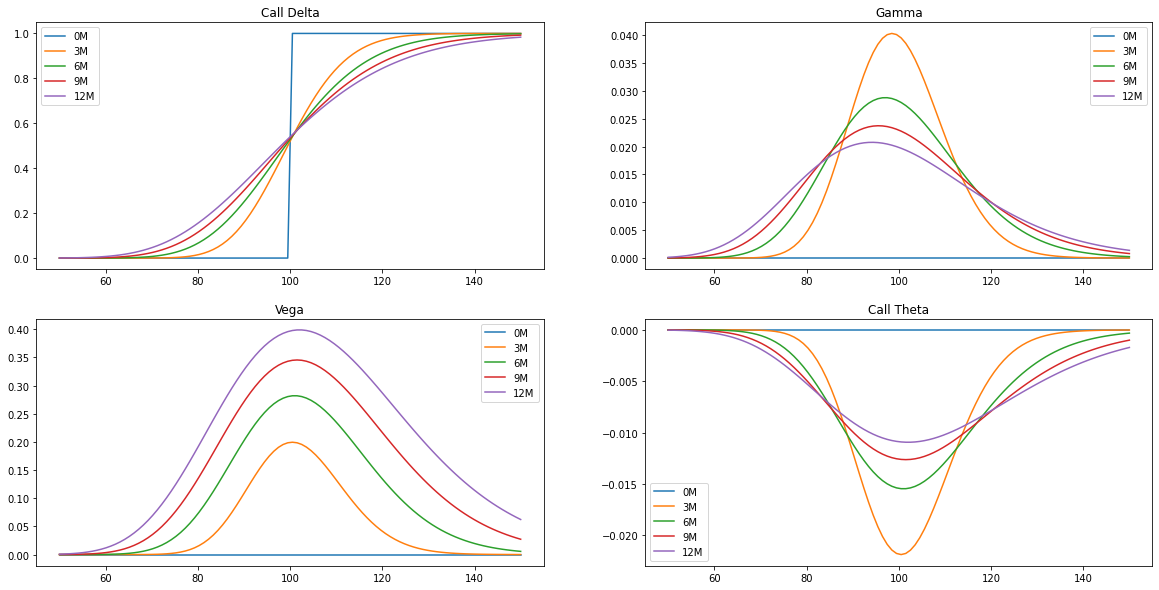

In [18]:
# Plot graph iteratively

fig, ax = plt.subplots(2,2, figsize=(20,10))

for k,v in d.items():
    ax[0,0].plot(x, BS(x,100,0.0,v,0.2).callDelta, label=k)
    ax[0,1].plot(x, BS(x,100,0.0,v,0.2).gamma, label=k)
    ax[1,0].plot(x, BS(x,100,0.0,v,0.2).vega, label=k)
    ax[1,1].plot(x, BS(x,100,0.0,v,0.2).callTheta, label=k)
    
# Set axis title
ax[0,0].set_title('Call Delta'), ax[0,1].set_title('Gamma'), ax[1,0].set_title('Vega'), ax[1,1].set_title('Call Theta')

# Define legend
ax[0,0].legend(), ax[0,1].legend(), ax[1,0].legend(), ax[1,1].legend()

plt.show()

In [19]:
# SPY options - real world data
# https://finance.yahoo.com/quote/SPY/options?date=1609372800&p=SPY

import yfinance as yf

spy = yf.Ticker('SPY')
options = spy.option_chain('2022-03-31')

# filter calls for strike above 330
df = options.calls[options.calls['strike']>330]
df.reset_index(drop=True, inplace=True)

# check the filtered output
df.iloc[:,:11].head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility
0,SPY220331C00335000,2022-03-03 17:41:59+00:00,335.0,102.50,117.13,117.98,0.000000,0.000000,8,0,1.187504
1,SPY220331C00340000,2022-03-25 19:56:41+00:00,340.0,112.05,112.13,112.98,-6.439995,-5.435054,1,13,1.135747
2,SPY220331C00345000,2022-03-17 18:21:32+00:00,345.0,93.99,107.13,107.98,0.000000,0.000000,11,0,1.083989
3,SPY220331C00350000,2022-03-16 15:19:05+00:00,350.0,82.50,102.13,102.83,0.000000,0.000000,2,1,0.937501
4,SPY220331C00355000,2022-02-02 18:01:18+00:00,355.0,102.57,76.72,77.93,0.000000,0.000000,5,15,0.000010


In [20]:
# March 2022 335 SPY call option price
# SPY220331C00340000: trade date 20220303, strike 335, implied vol 1.186504 -> price 102.50 bid 117.13 ask 117.98
spot = 434.36
strike = 335
rate = 0.0
ttm = 0.025
vol = 1.135747
spy_opt = BS(spot,strike,rate,ttm,vol)
print(f'Option Price of SPY220331C00340000 with BS Model is {spy_opt.callPrice:0.4f}')

Option Price of SPY220331C00340000 with BS Model is 101.6193


In [21]:
# dataframe manipulation with selected fields
df = pd.DataFrame({'Strike': df['strike'], 
                   'Price': df['lastPrice'], 
                   'ImpVol': df['impliedVolatility']})
# Check output
df.head(2)

,Strike,Price,ImpVol
0,335.0,102.50,1.187504
1,340.0,112.05,1.135747


In [22]:
# derive greeks from real world data

df['Delta'] = df['Gamma'] = df['Vega'] = df['Theta'] = 0.

for i in range(len(df)):
    
    df['Delta'].iloc[i] = BS(spot,df['Strike'].iloc[i],rate,ttm,df['ImpVol'].iloc[i]).callDelta
    df['Gamma'].iloc[i] = BS(spot,df['Strike'].iloc[i],rate,ttm,df['ImpVol'].iloc[i]).gamma
    df['Vega'].iloc[i] = BS(spot,df['Strike'].iloc[i],rate,ttm,df['ImpVol'].iloc[i]).vega
    df['Theta'].iloc[i] = BS(spot,df['Strike'].iloc[i],rate,ttm,df['ImpVol'].iloc[i]).callTheta

In [23]:
# verify output
df.head()

,Strike,Price,ImpVol,Delta,Gamma,Vega,Theta
0,335.0,102.50,1.187504,0.930196,0.001643,0.092014,-0.598725
1,340.0,112.05,1.135747,0.926986,0.001778,0.095245,-0.592736
2,345.0,93.99,1.083989,0.923578,0.001929,0.098619,-0.585763
3,350.0,82.50,0.937501,0.937102,0.001920,0.084882,-0.436040
4,355.0,102.57,0.000010,1.000000,0.000000,0.000000,-0.000000


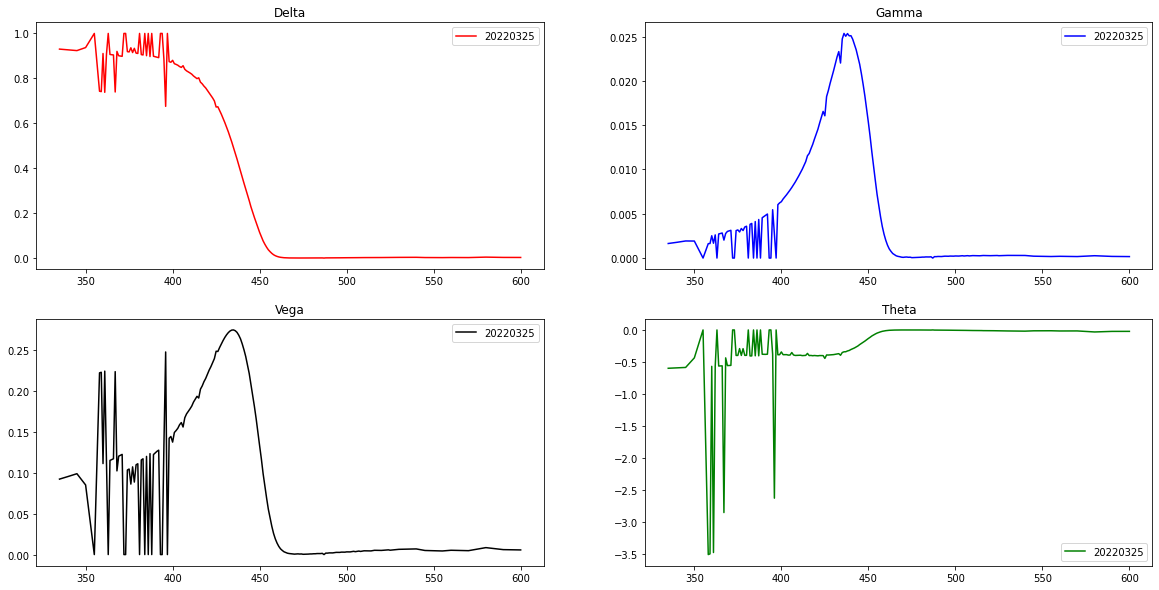

In [24]:
# visualize the data
# plot graph iteratively
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].plot(df['Strike'], df['Delta'], color='r', label='20220325')
ax[0,1].plot(df['Strike'], df['Gamma'], color='b', label='20220325')
ax[1,0].plot(df['Strike'], df['Vega'], color='k', label='20220325')
ax[1,1].plot(df['Strike'], df['Theta'], color='g', label='20220325')
    
# Set axis title
ax[0,0].set_title('Delta'), ax[0,1].set_title('Gamma'), ax[1,0].set_title('Vega'), ax[1,1].set_title('Theta')

# Define legend
ax[0,0].legend(), ax[0,1].legend(), ax[1,0].legend(), ax[1,1].legend()

plt.show()